In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:

df = pd.read_csv(r"C:\Users\Admin\Desktop\spaceship-titanic\train.csv")
features= df.columns
corrupt_features=["Age","RoomService","ShoppingMall","FoodCourt","Spa","VRDeck"]
print(df.head())
print(features)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
In

In [34]:

CATEGORICAL= ["Name","PassengerId","HomePlanet","CryoSleep","Cabin","Destination","VIP","Transported"]
for feature in CATEGORICAL:
    unique_values= list(df[feature].unique())
    print(f"{feature} has {len(unique_values)} unique values\n")
    mapped= []
    for value in df[feature]:
        mapped.append(unique_values.index(value))
    df[feature]= mapped

Name has 8474 unique values

PassengerId has 8693 unique values

HomePlanet has 4 unique values

CryoSleep has 3 unique values

Cabin has 6561 unique values

Destination has 4 unique values

VIP has 3 unique values

Transported has 2 unique values



In [35]:

for feature in corrupt_features:
    df[feature].fillna(df[feature].median(skipna=True),inplace=True)
for feature in df.columns:
    print(f"{feature} has {df[feature].isnull().sum()}")
print(f"After Integer Encoding...\n{df.head()}")
dlabels= df.pop("Transported")
X_train,X_test,y_train,y_test= train_test_split(df,dlabels,test_size= 0.20)
print(f"X_train.shape:{X_train.shape}, y_train.shape:{y_train.shape}")

PassengerId has 0
HomePlanet has 0
CryoSleep has 0
Cabin has 0
Destination has 0
Age has 0
VIP has 0
RoomService has 0
FoodCourt has 0
ShoppingMall has 0
Spa has 0
VRDeck has 0
Name has 0
Transported has 0
After Integer Encoding...
   PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0            0           0          0      0            0  39.0    0   
1            1           1          0      1            0  24.0    0   
2            2           0          0      2            0  58.0    1   
3            3           0          0      2            0  33.0    0   
4            4           1          0      3            0  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0          0.0        0.0           0.0     0.0     0.0     0            0  
1        109.0        9.0          25.0   549.0    44.0     1            1  
2         43.0     3576.0           0.0  6715.0    49.0     2            0  
3          0.0     1283.0  

C:\Users\Admin\AppData\Local\Temp\ipykernel_9356\2172835956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(skipna=True),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9356\2172835956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [36]:

X_train= np.array(X_train)
X_test= np.array(X_test)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print(X_train.shape)
print(f"After scaling,Here are the ranges of values for all the features...{np.ptp(X_train,axis= 0)}")


(6954, 13)
After scaling,Here are the ranges of values for all the features...[ 3.46892331  4.07933462  3.71049844  3.39472032  3.37846814  5.49623916
  5.89536947 22.11360936 18.60361606 40.98542103 20.74033984 20.52471694
  3.39735547]


In [37]:

model= Sequential([
    InputLayer(input_shape=(13,)),
    Dense(20,activation="linear"),
    Dense(10,activation="linear"),
    Dense(1,activation="sigmoid")
    
])
print(model.summary())

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:

model.compile(loss= BinaryCrossentropy,optimizer= Adam(0.0001),metrics=["accuracy"])


Epoch 1/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5501 - loss: 0.7993 - val_accuracy: 0.6061 - val_loss: 0.6866
Epoch 2/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 0.6634 - val_accuracy: 0.6814 - val_loss: 0.6053
Epoch 3/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.5946 - val_accuracy: 0.7350 - val_loss: 0.5661
Epoch 4/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.5542 - val_accuracy: 0.7456 - val_loss: 0.5481
Epoch 5/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5427 - val_accuracy: 0.7518 - val_loss: 0.5375
Epoch 6/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.5293 - val_accuracy: 0.7542 - val_loss: 0.5302
Epoch 7/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7574 - loss: 0.5272 - val_accuracy: 0.7537 - val_loss: 0.5249
Epoch 8/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.5157 - val_accu

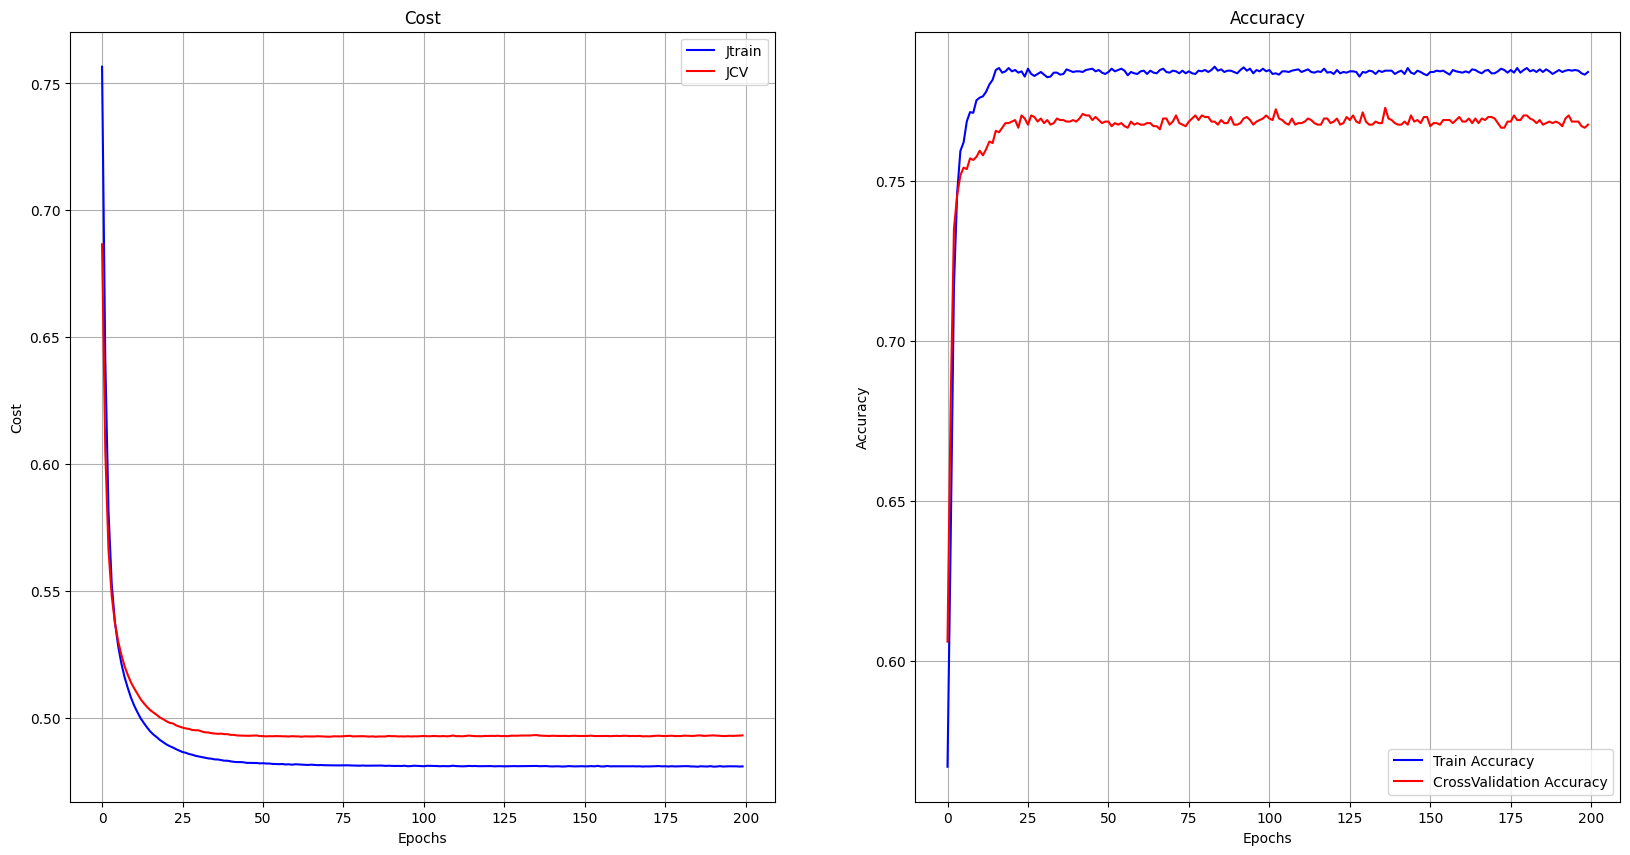

In [39]:

history= model.fit(X_train,y_train,epochs=200,validation_split=0.3)
def plotCost(history):
    fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    ax[0].set_title("Cost")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Cost")
    ax[0].plot(history.history["loss"],"b-",label="Jtrain")
    ax[0].plot(history.history["val_loss"],"r-",label="JCV")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Accuracy")
    ax[1].plot(history.history["accuracy"],"b-",label="Train Accuracy")
    ax[1].plot(history.history["val_accuracy"],"r-",label="CrossValidation Accuracy")
    ax[1].legend()
    ax[1].grid(True)
plotCost(history)
    

In [40]:

print(f"[loss,accuracy]:{model.evaluate(X_test,y_test)}")
test= pd.read_csv(r"C:\Users\Admin\Desktop\spaceship-titanic\test.csv")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4794 
[loss,accuracy]:[0.48898565769195557, 0.795859694480896]


In [41]:

print(test.tail())
Ids= test["PassengerId"]
CATEGORICAL.remove("Transported")
for feature in CATEGORICAL:
    unique_values= list(test[feature].unique())
    mapped= []
    for value in test[feature]:
        mapped.append(unique_values.index(value))
    test[feature]= mapped
for feature in test.columns:
    print(f"{feature} has {test[feature].isnull().sum()}")
corrupt_features=["Age","RoomService","ShoppingMall","FoodCourt","Spa","VRDeck"]
for feature in corrupt_features:
    test[feature].fillna(df[feature].median(skipna=True),inplace=True)
test= np.array(test)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  
4272          0.0        0.0           0.0   0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0  10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0   0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0   0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0   0.0     0.0  Lilace Leonzaley  
PassengerId has 0
HomePlanet has 0
CryoSleep has 0
Cabin has 0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9356\1284448079.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[feature].fillna(df[feature].median(skipna=True),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9356\1284448079.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [42]:
test= scaler.transform(test)
print(f"The range of values for Test data features is {np.ptp(test,axis=0)}")

The range of values for Test data features is [ 1.70672144  4.07933462  3.71049844  1.68959784  3.37846814  5.49623916
  5.89536947 17.85357154 15.77060976 14.46667424 18.36715922 18.94196725
  1.67461714]


In [43]:

y_hat= model.predict(X_test)
nd_y_test= np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


In [44]:

y_hat= model.predict(X_test)
nd_y_test= np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


In [45]:

def confusion_matrix(thresh_val,y_hat):
    true_pos=0
    true_neg=0
    false_pos=0
    false_neg= 0
    for i in range(len(y_hat)):
        if (y_hat[i]>= thresh_val)&(nd_y_test[i]==1):
            true_pos+=1
        elif (y_hat[i]< thresh_val)&(nd_y_test[i]==0):
            true_neg+=1
        elif (y_hat[i]>= thresh_val)&(nd_y_test[i]==0):
            false_pos+=1
        elif (y_hat[i]< thresh_val)&(nd_y_test[i]==1):
            false_neg+=1
    precision= true_pos/(true_pos+false_pos)
    recall= true_pos/(true_pos+false_neg)
    matrix=np.array([[true_neg,false_neg],[false_pos,true_pos]])
    f1_score= 2/np.sum([1/precision,1/recall])
    matrix= pd.DataFrame(matrix,columns=["NegativeClass","PositiveClass"],index=["NegativePrediction","PositivePredictions"])
    return {"precision":precision,"recall":recall,"confusion matrix":matrix,"f1_score":f1_score}
prec_recall_f1score=confusion_matrix(thresh_val=0.5,y_hat=y_hat)
print(prec_recall_f1score)

{'precision': 0.7789473684210526, 'recall': 0.8361581920903954, 'confusion matrix':                      NegativeClass  PositiveClass
NegativePrediction             644            145
PositivePredictions            210            740, 'f1_score': np.float64(0.8065395095367847)}


recall number:20,prec number:20,f1 number:20


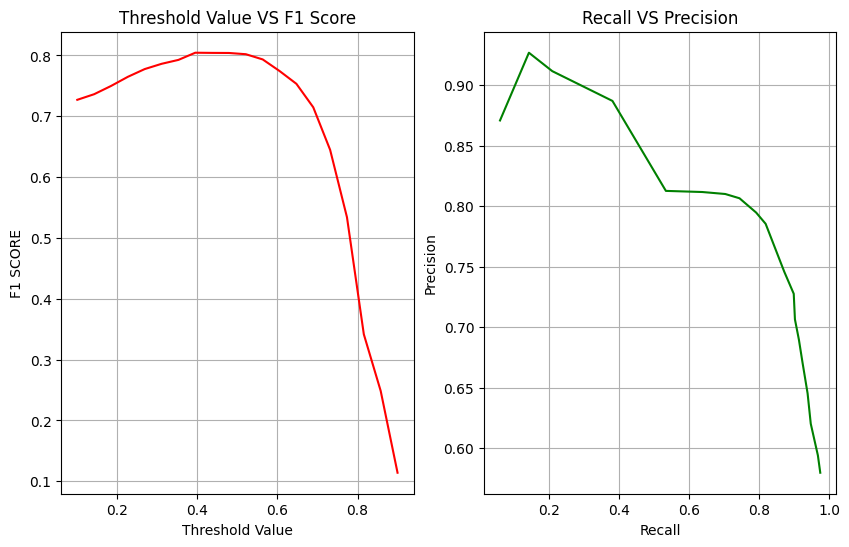

Optimum Threshold Value:0.39473684210526316
Max F1 SCORE:0.8044466902475997
Precision:0.7276051188299817
Recall:0.8994350282485876
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Number of nan values:0


In [46]:

thresh_values= np.linspace(0.1,0.9,20)
f1_scores= []
precision_scores= []
recall_scores=[]
for i in range(len(thresh_values)):
    f1_scores.append(confusion_matrix(thresh_values[i],y_hat=y_hat)["f1_score"])
    precision_scores.append(confusion_matrix(thresh_values[i],y_hat=y_hat)["precision"])
    recall_scores.append(confusion_matrix(thresh_values[i],y_hat=y_hat)["recall"])
def plot_precision_recall_f1_score():
    fig,ax= plt.subplots(1,2,figsize=(10,6))
    ax[0].set_title("Threshold Value VS F1 Score")
    ax[0].set_ylabel("F1 SCORE")
    ax[0].set_xlabel("Threshold Value")
    ax[0].plot(thresh_values,f1_scores,"r-")
    ax[0].grid(True)
    ax[1].set_title("Recall VS Precision")
    ax[1].set_ylabel("Precision")
    ax[1].set_xlabel("Recall")
    ax[1].plot(recall_scores,precision_scores,"g-")
    ax[1].grid(True)
    plt.show()
print(f"recall number:{len(recall_scores)},prec number:{len(precision_scores)},f1 number:{len(f1_scores)}")
plot_precision_recall_f1_score()
f1_scores= np.array(f1_scores)
f1_scores_max= f1_scores.max()
thresh_values_optimum= thresh_values[list(f1_scores).index(f1_scores_max)]
prec_optimum= precision_scores[list(f1_scores).index(f1_scores_max)]
recall_optimum= recall_scores[list(f1_scores).index(f1_scores_max)]
print(f"Optimum Threshold Value:{thresh_values_optimum}\nMax F1 SCORE:{f1_scores_max}\nPrecision:{prec_optimum}\nRecall:{recall_optimum}")
Test_y_hat= model.predict(test)
transported=[]
print(f"Number of nan values:{np.isnan(Test_y_hat).sum()}")
for i in range(len(Test_y_hat)):
    if Test_y_hat[i]>= thresh_values_optimum:
        transported.append("True")
    else:
        transported.append("False")



In [47]:
my_submission= {"PassengerID":list(Ids),"Transported":transported}
my_submission= pd.DataFrame(my_submission)
print(my_submission)
my_submission.to_csv("submission.csv",index=False)

     PassengerID Transported
0        0013_01        True
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
...          ...         ...
4272     9266_02        True
4273     9269_01        True
4274     9271_01        True
4275     9273_01        True
4276     9277_01        True

[4277 rows x 2 columns]
